In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import folium
from folium.plugins import MarkerCluster

In [3]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

<ipython-input-3-b701c68efb3f>:1: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 12.3+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.196000e+04,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,...,3.500000e+02,1.0,8.100000e+01,1.0,518.000000,400.000000,11959.000000,11959.000000,11959.000000,11959.000000
mean,1.976790e+11,1976.726338,6.170569,15.243227,0.023411,205.097910,5.881355,31.330726,-22.842727,1.213796,...,4.202714e+06,20000.0,1.461872e+06,0.0,2.839768,5.982500,-3.326532,-3.278284,0.310059,-2.122335
std,3.022204e+08,3.024931,3.338024,8.942614,0.151212,181.789798,3.326011,22.026742,54.525074,0.841495,...,5.377014e+07,NaN,5.045784e+06,NaN,1.265294,23.322243,4.476546,4.525668,0.663122,4.364938
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.975050e+11,1975.000000,3.000000,8.000000,0.000000,83.000000,2.000000,14.622869,-75.416953,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.978022e+11,1978.000000,6.000000,15.000000,0.000000,155.000000,8.000000,39.930771,-5.956210,1.000000,...,0.000000e+00,20000.0,8.000000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.979073e+11,1979.000000,9.000000,23.000000,0.000000,217.000000,8.000000,45.434336,11.346518,1.000000,...,4.132500e+05,20000.0,1.000000e+06,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.980093e+11,1980.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999939,-0.076723,-0.003888,-0.048865,-0.303302,0.120770,-0.188653,0.125869,0.108218,...,0.023790,NaN,-0.099773,NaN,0.045834,-0.138478,-0.014214,-0.019419,-0.197244,-0.105336
iyear,0.999939,1.000000,-0.087689,-0.004167,-0.048879,-0.303385,0.120718,-0.188417,0.125829,0.108660,...,0.024261,NaN,-0.102805,NaN,0.045524,-0.138252,-0.014752,-0.019949,-0.197706,-0.106004
imonth,-0.076723,-0.087689,1.000000,-0.001244,0.005175,0.031263,-0.005746,-0.006958,-0.007068,-0.048528,...,-0.044111,NaN,0.233870,NaN,0.021267,-0.006633,0.049814,0.049526,0.057289,0.068966
iday,-0.003888,-0.004167,-0.001244,1.000000,0.000736,0.029119,0.010594,0.013356,0.014520,-0.022434,...,0.008280,NaN,0.024744,NaN,0.067291,-0.021941,0.007450,0.006593,0.026862,0.020277
extended,-0.048865,-0.048879,0.005175,0.000736,1.000000,-0.089379,-0.031553,-0.109830,-0.021496,0.048719,...,-0.041433,NaN,-0.139815,NaN,-0.129813,-0.011568,0.029331,0.039459,0.032677,0.025878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.138478,-0.138252,-0.006633,-0.021941,-0.011568,0.054137,0.127976,0.183639,0.189493,-0.061235,...,-0.008209,NaN,0.056744,NaN,-0.120015,1.000000,0.029828,0.034355,0.060927,0.048926
INT_LOG,-0.014214,-0.014752,0.049814,0.007450,0.029331,0.171460,0.064100,0.088977,0.037446,0.021754,...,0.036516,NaN,-0.052789,NaN,-0.086222,0.029828,1.000000,0.993960,0.115439,0.779163
INT_IDEO,-0.019419,-0.019949,0.049526,0.006593,0.039459,0.159128,0.065391,0.080871,0.037830,0.020895,...,0.032689,NaN,-0.047438,NaN,-0.101381,0.034355,0.993960,1.000000,0.143866,0.781762
INT_MISC,-0.197244,-0.197706,0.057289,0.026862,0.032677,0.400046,0.191641,0.216751,0.138025,-0.046879,...,-0.016602,NaN,0.019329,NaN,0.007496,0.060927,0.115439,0.143866,1.000000,0.409901


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

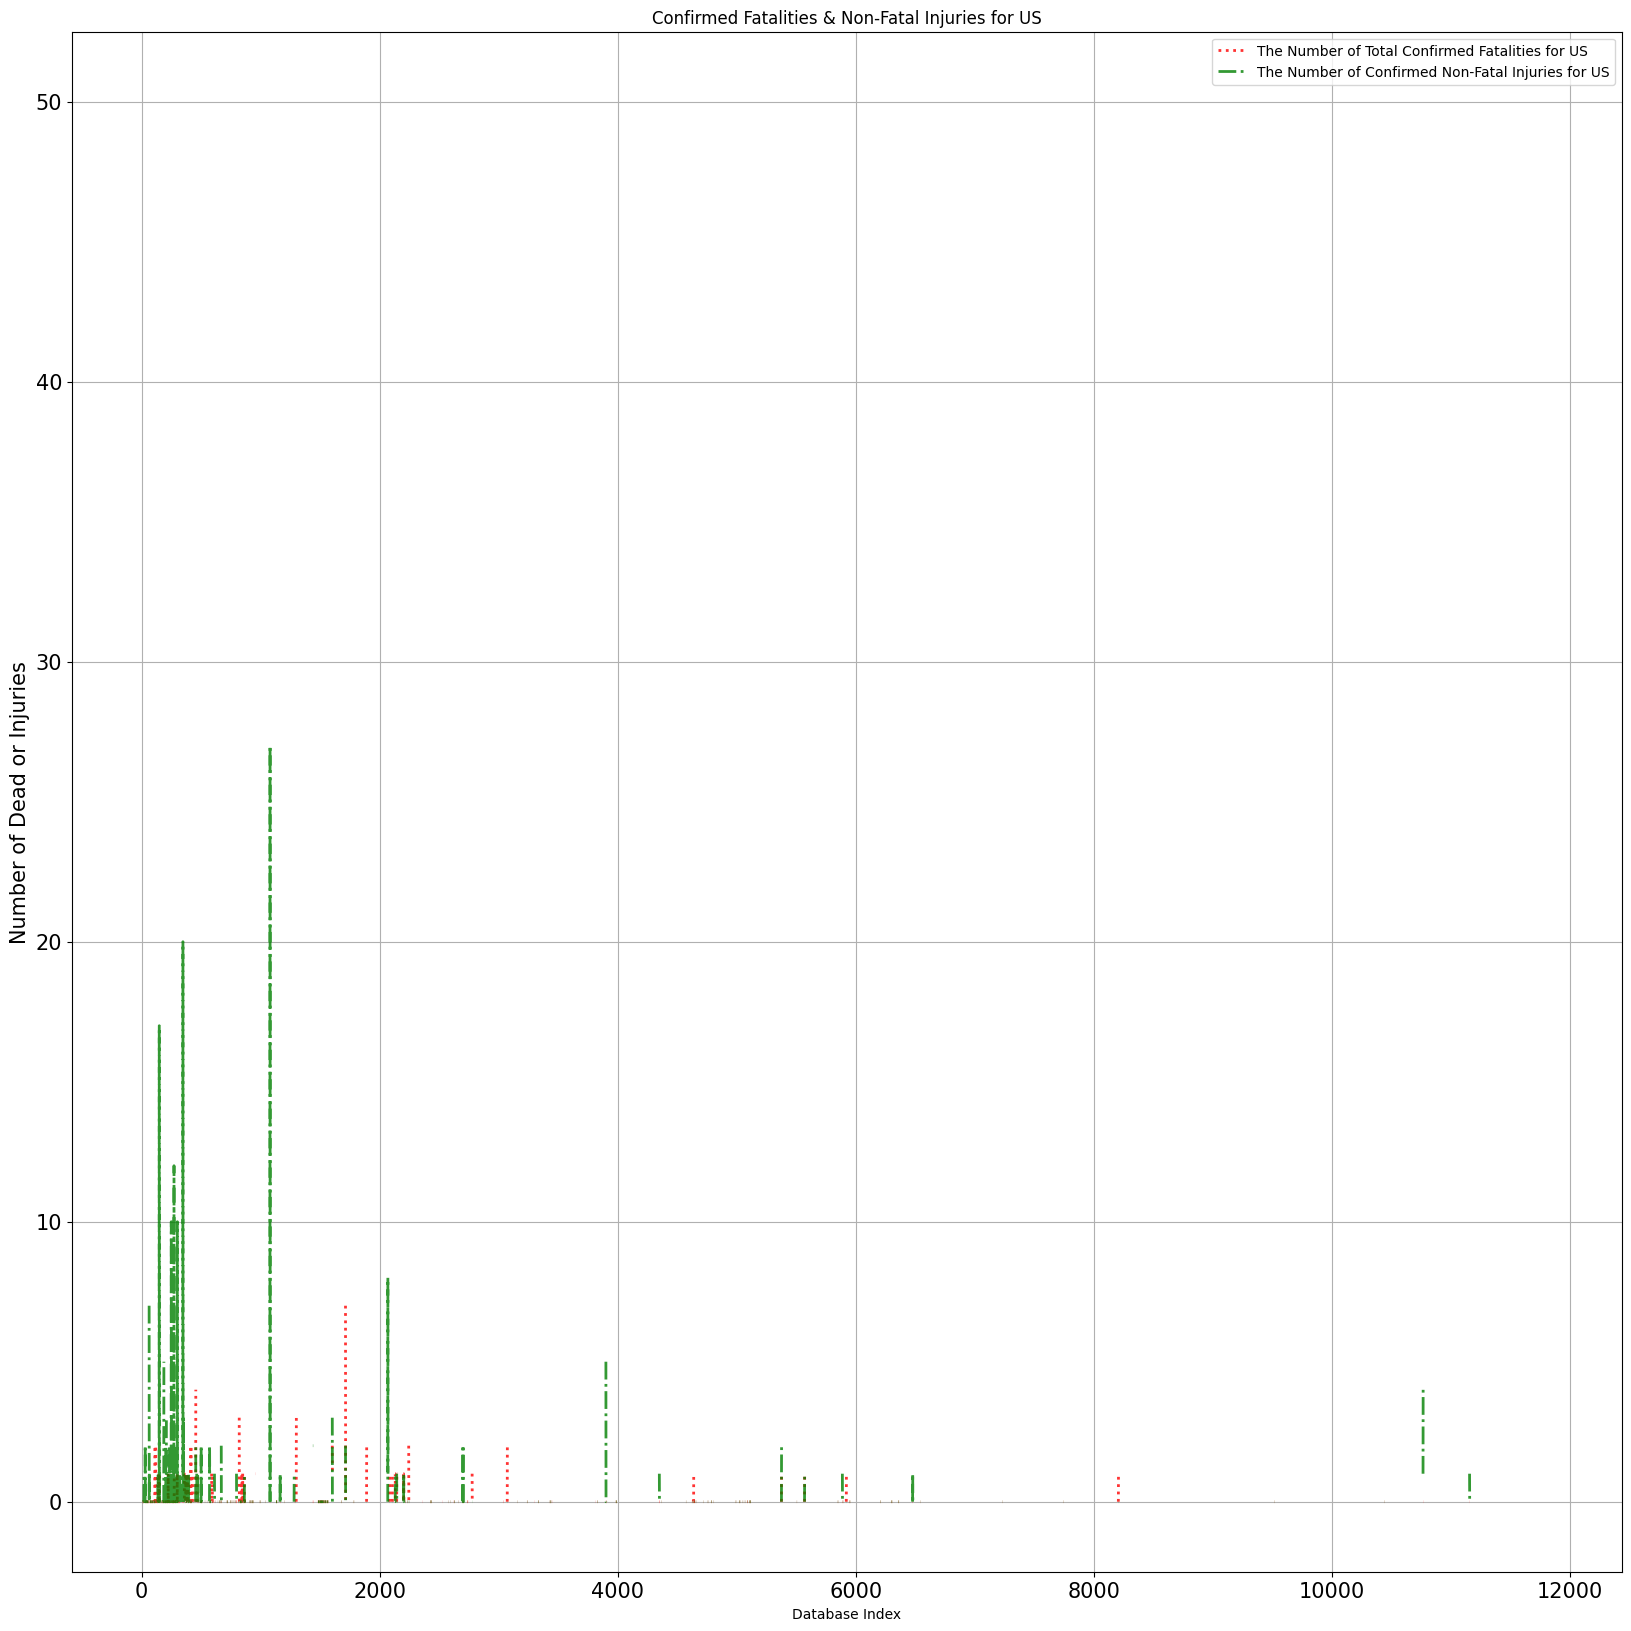

In [9]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

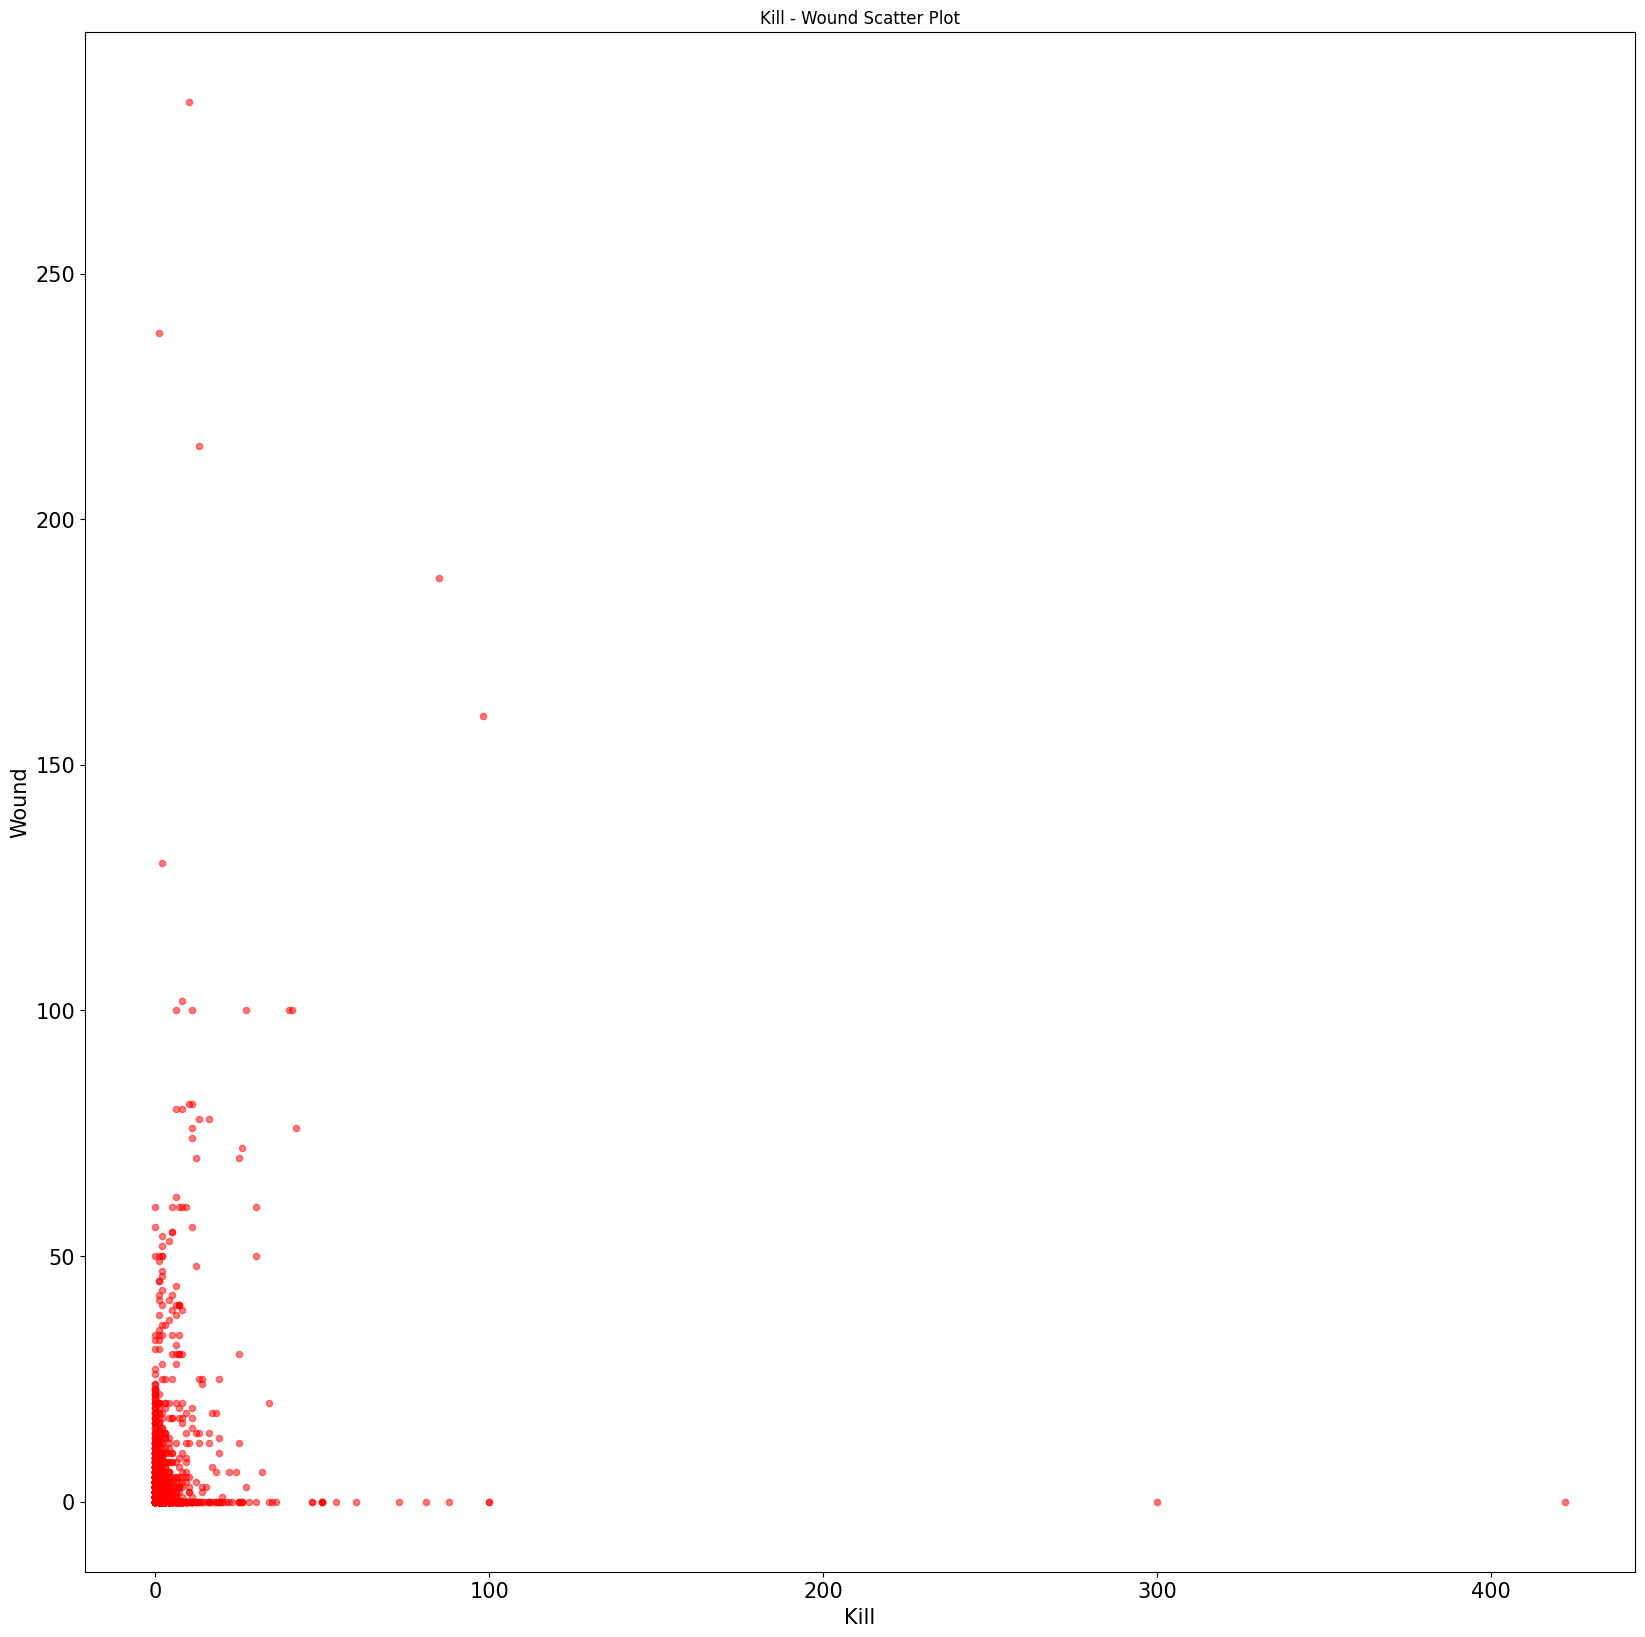

In [10]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

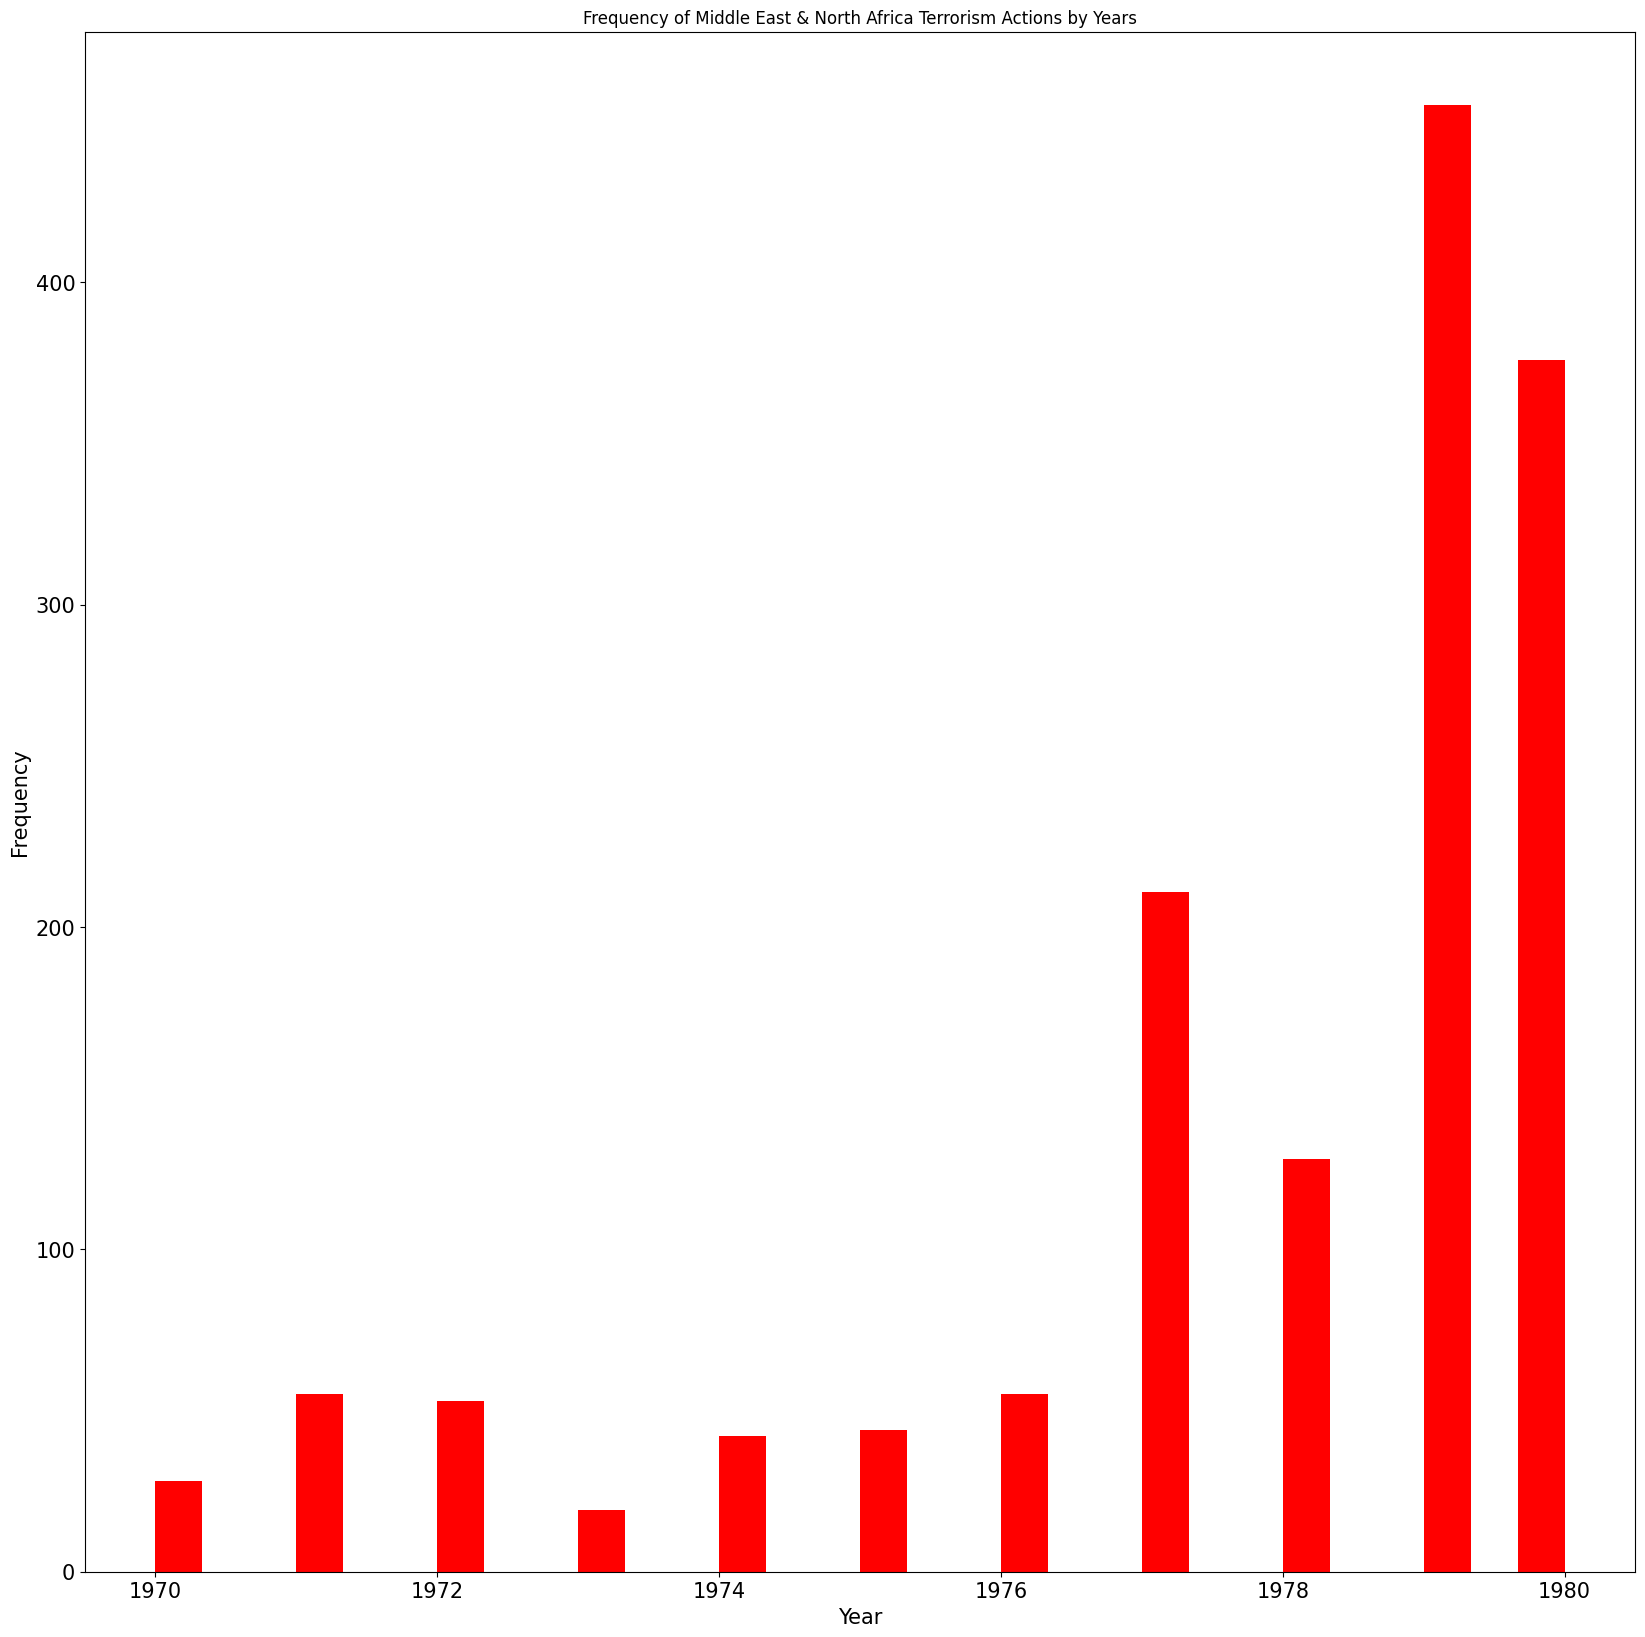

In [11]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

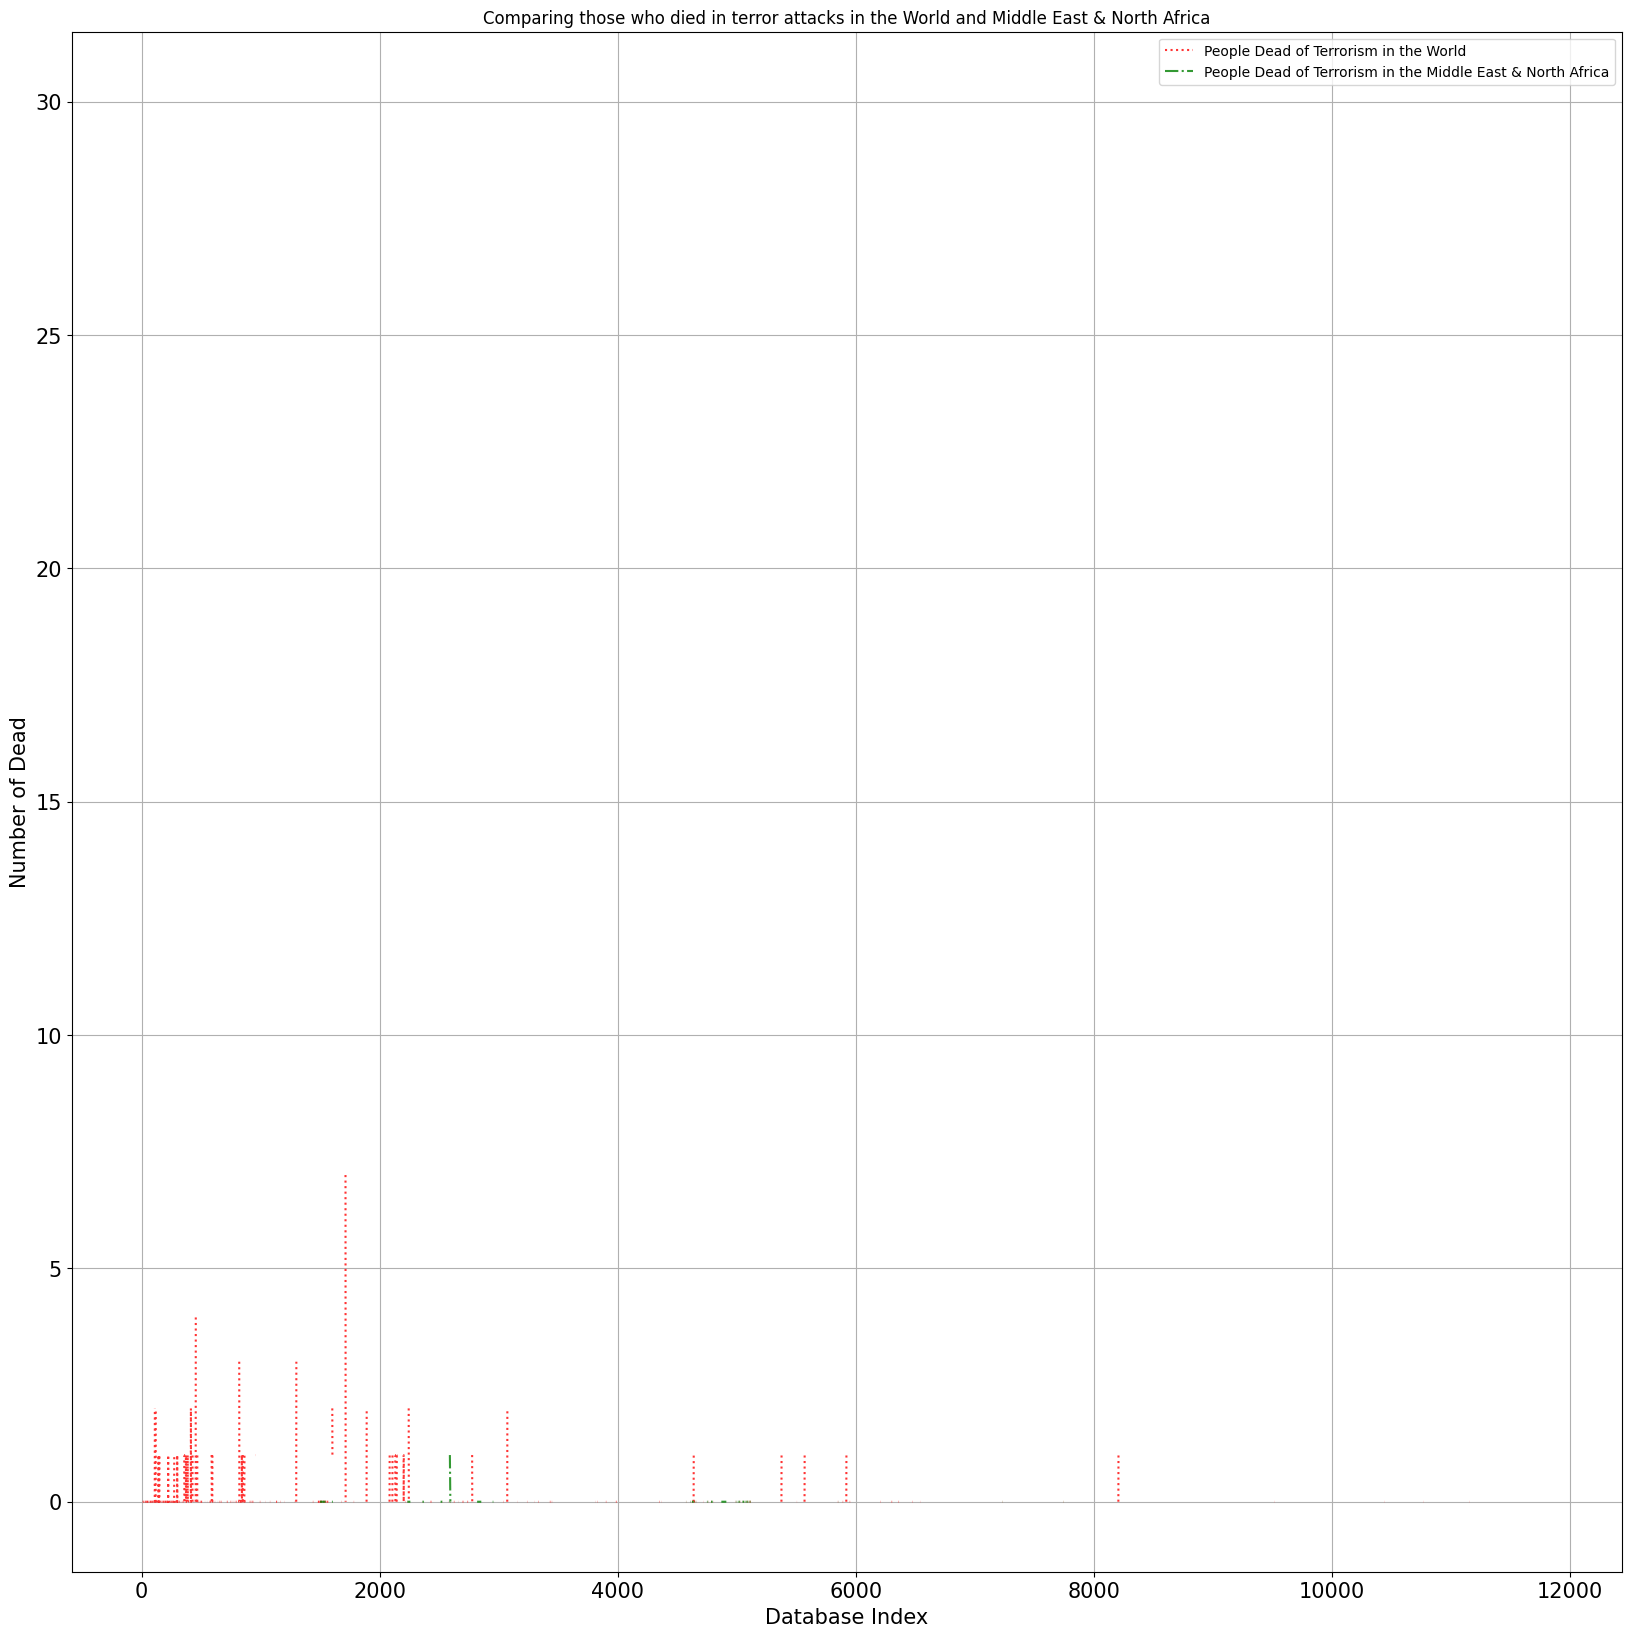

In [12]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

In [13]:
filterYear = df['iyear'] == 1970

In [14]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [15]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 10514


In [16]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [17]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,3598.0,2520.0,2762.0,513.0,175.0,206.0,271.0,16.0,453.0


In [18]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


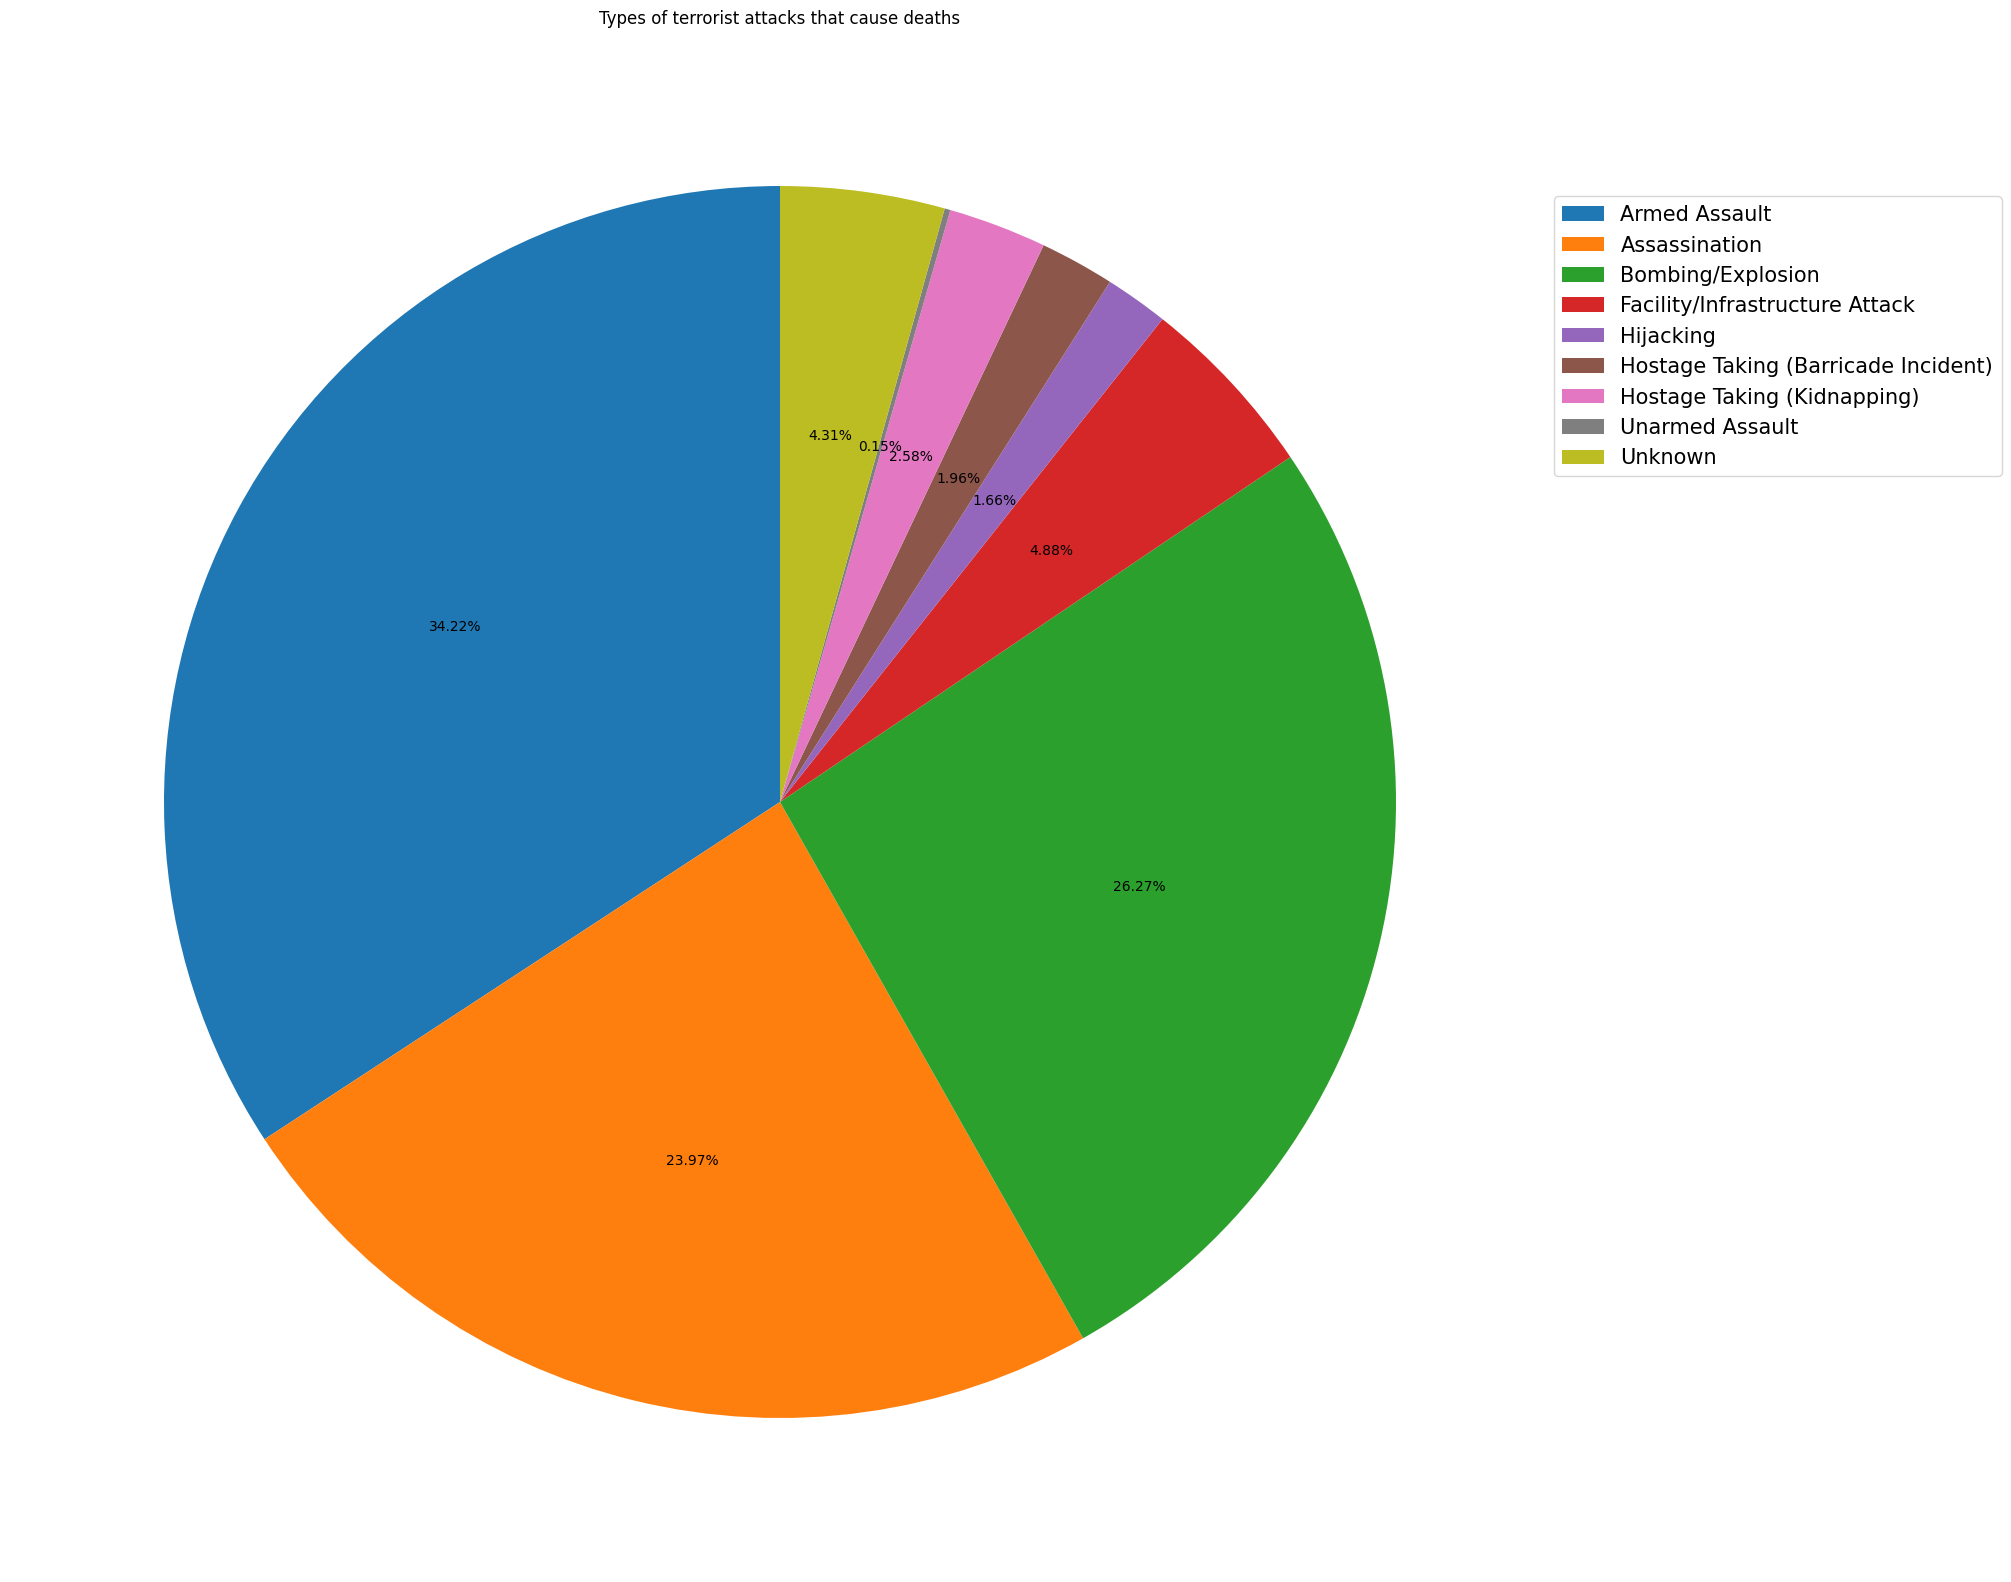

In [19]:
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T
values = transpoze.values.flatten().tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()

In [20]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [21]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,...,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,19.0,328.0,3.0,9.0,0.0,0.0,6.0,...,195.0,4.0,3.0,38.0,59.0,0.0,2.0,1.0,5.0,4.0


In [22]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 117 entries, Afghanistan to Zimbabwe
dtypes: float64(117)
memory usage: 944.0+ bytes


In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

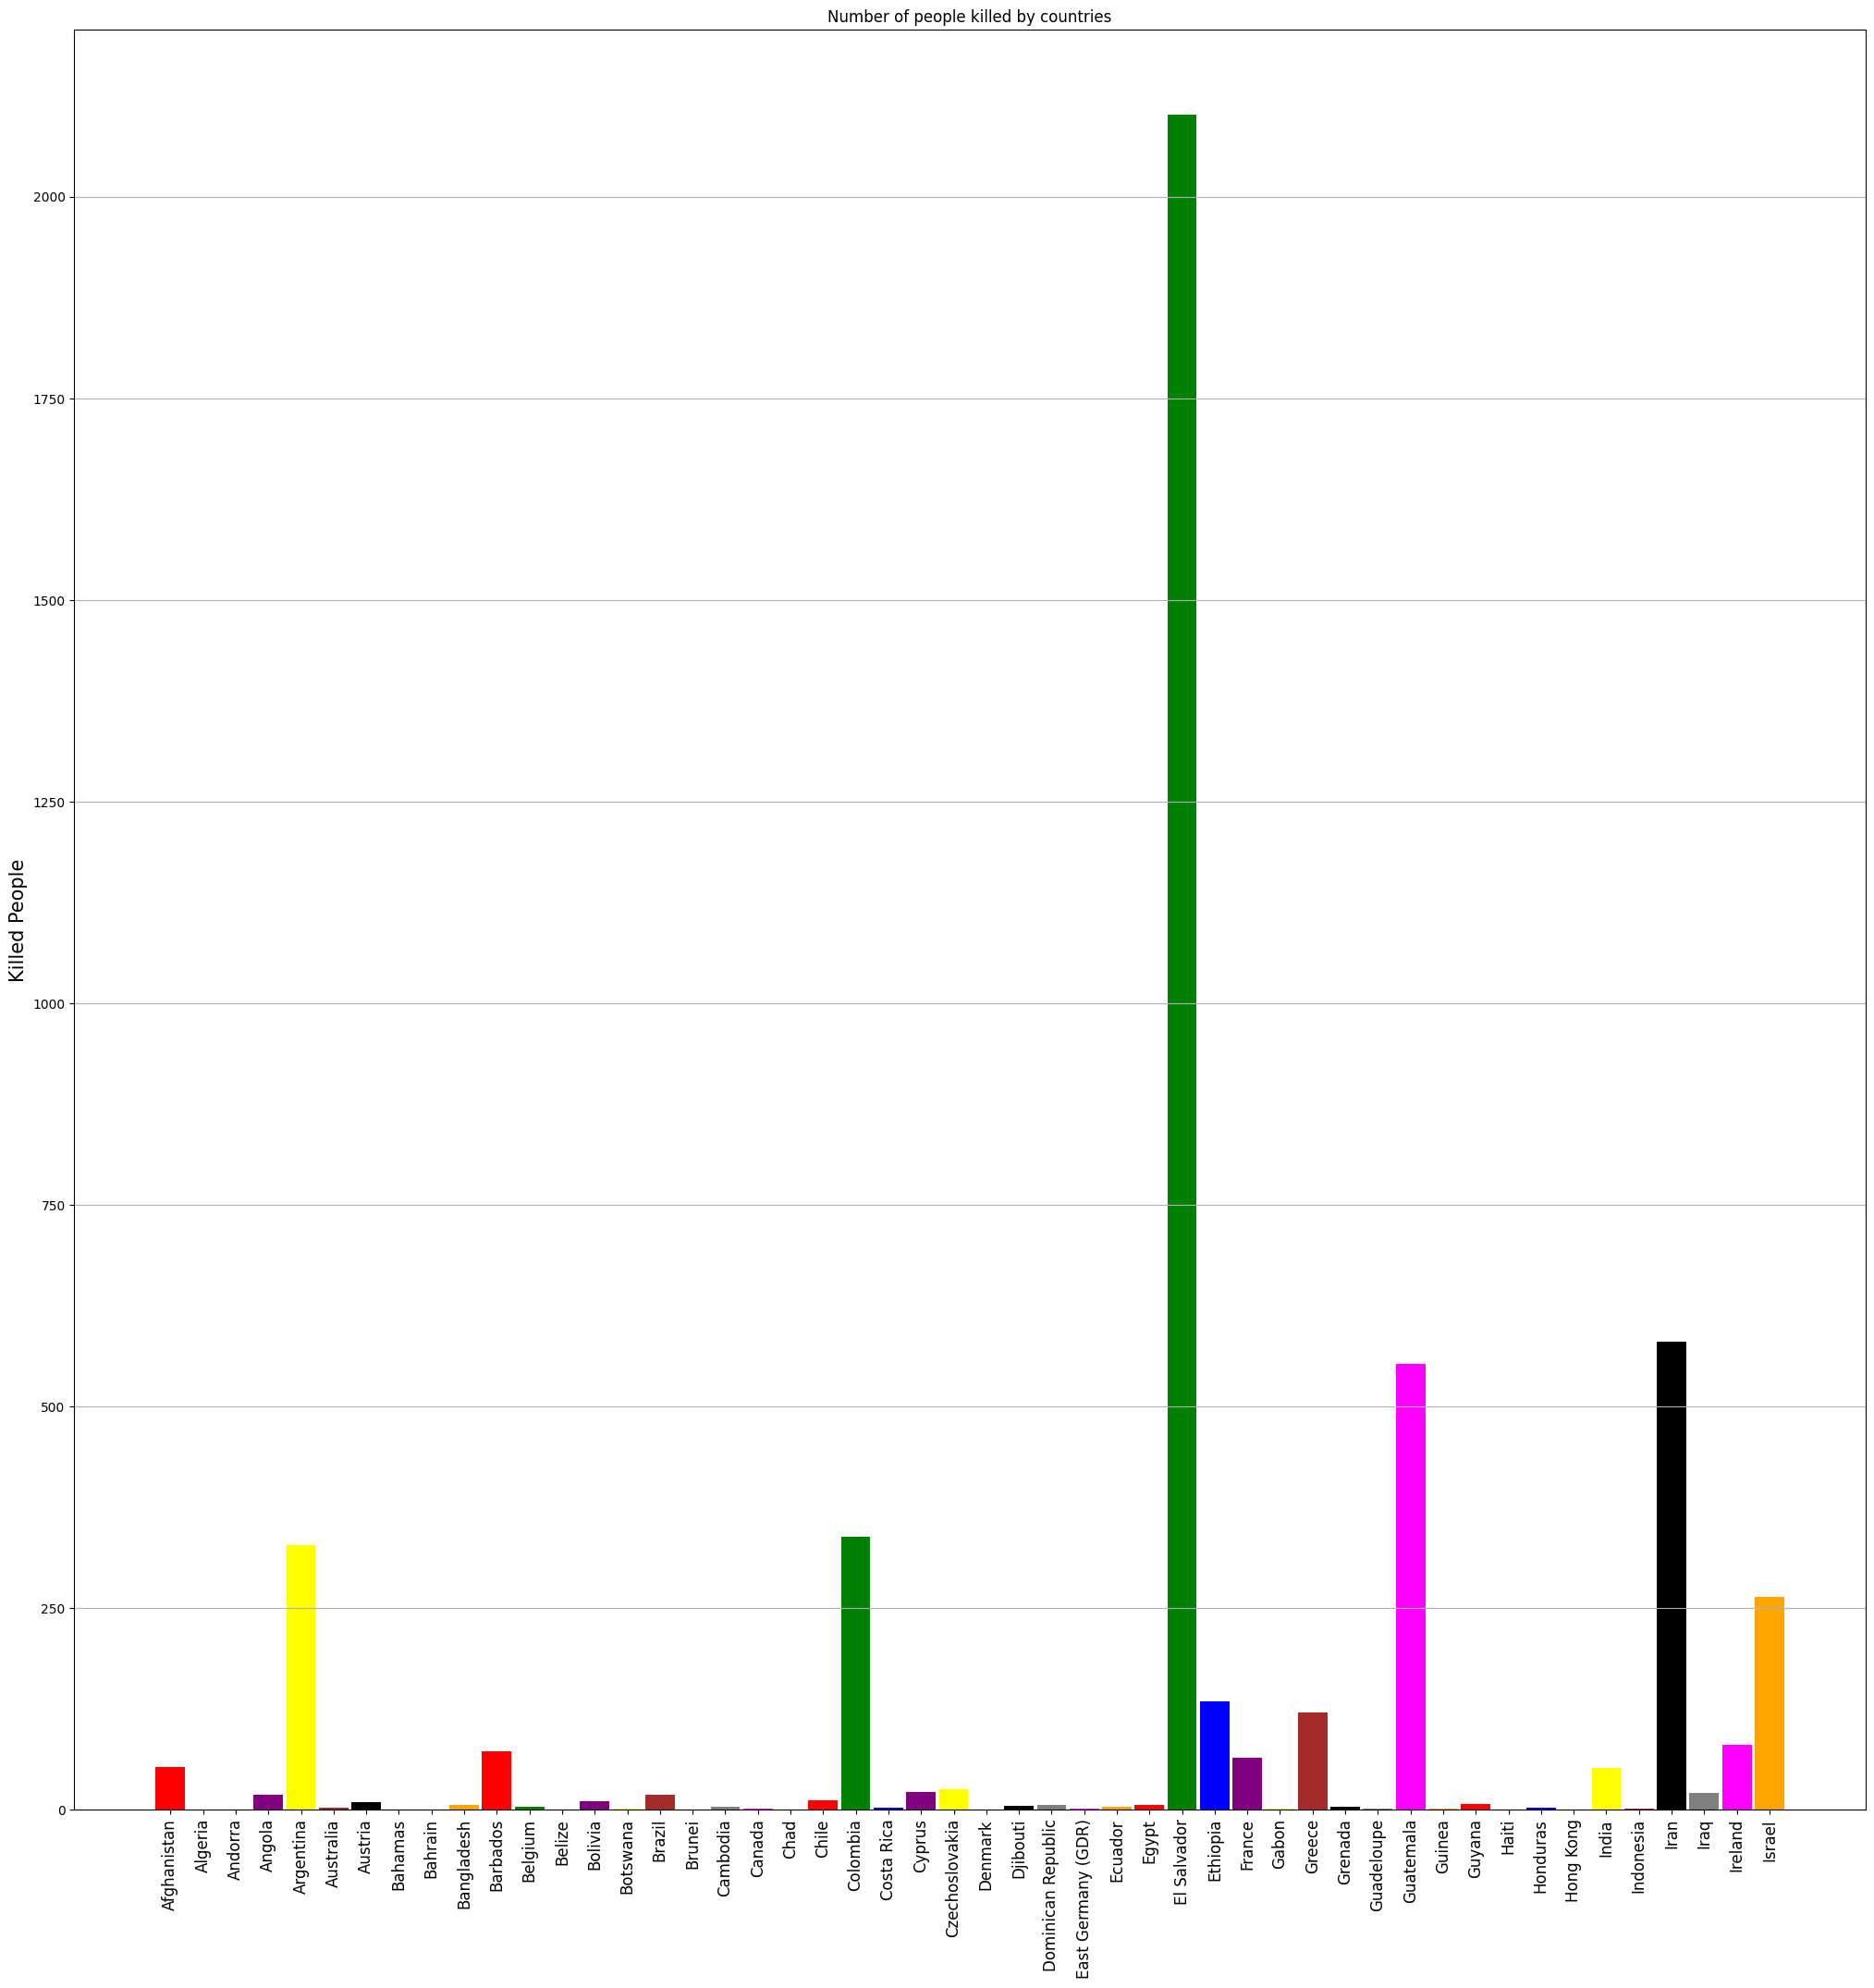

In [24]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

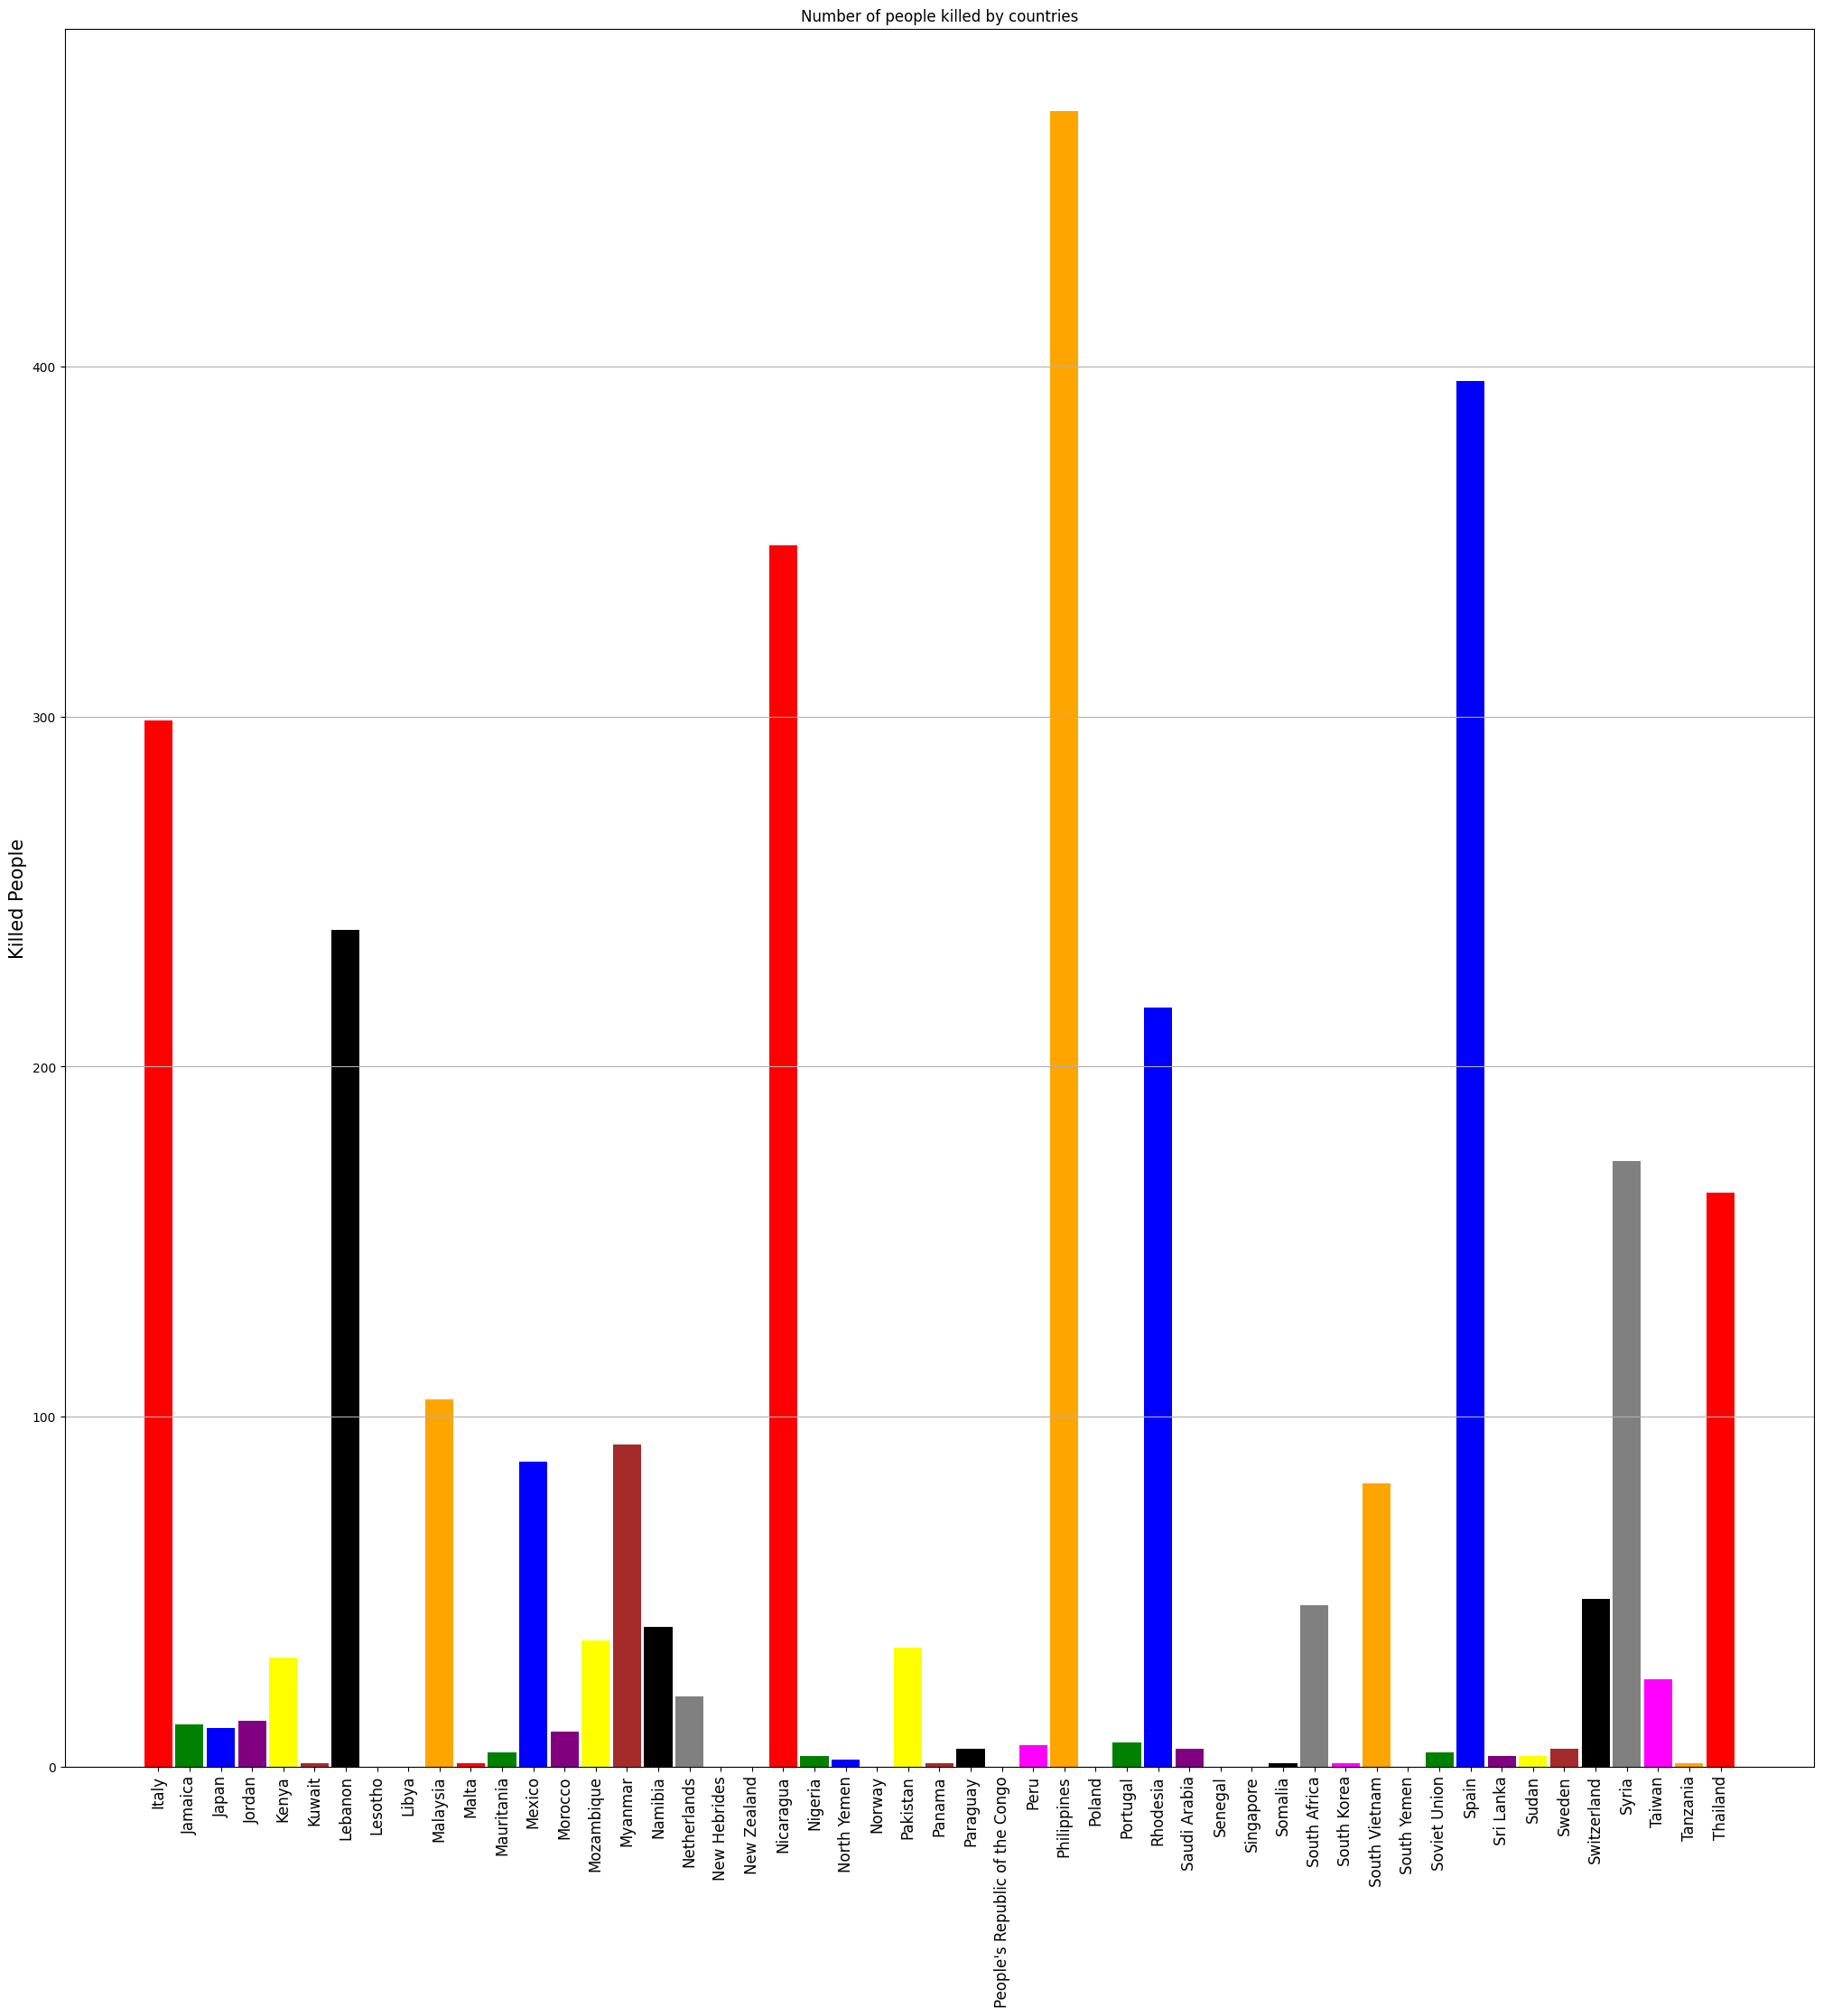

In [25]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

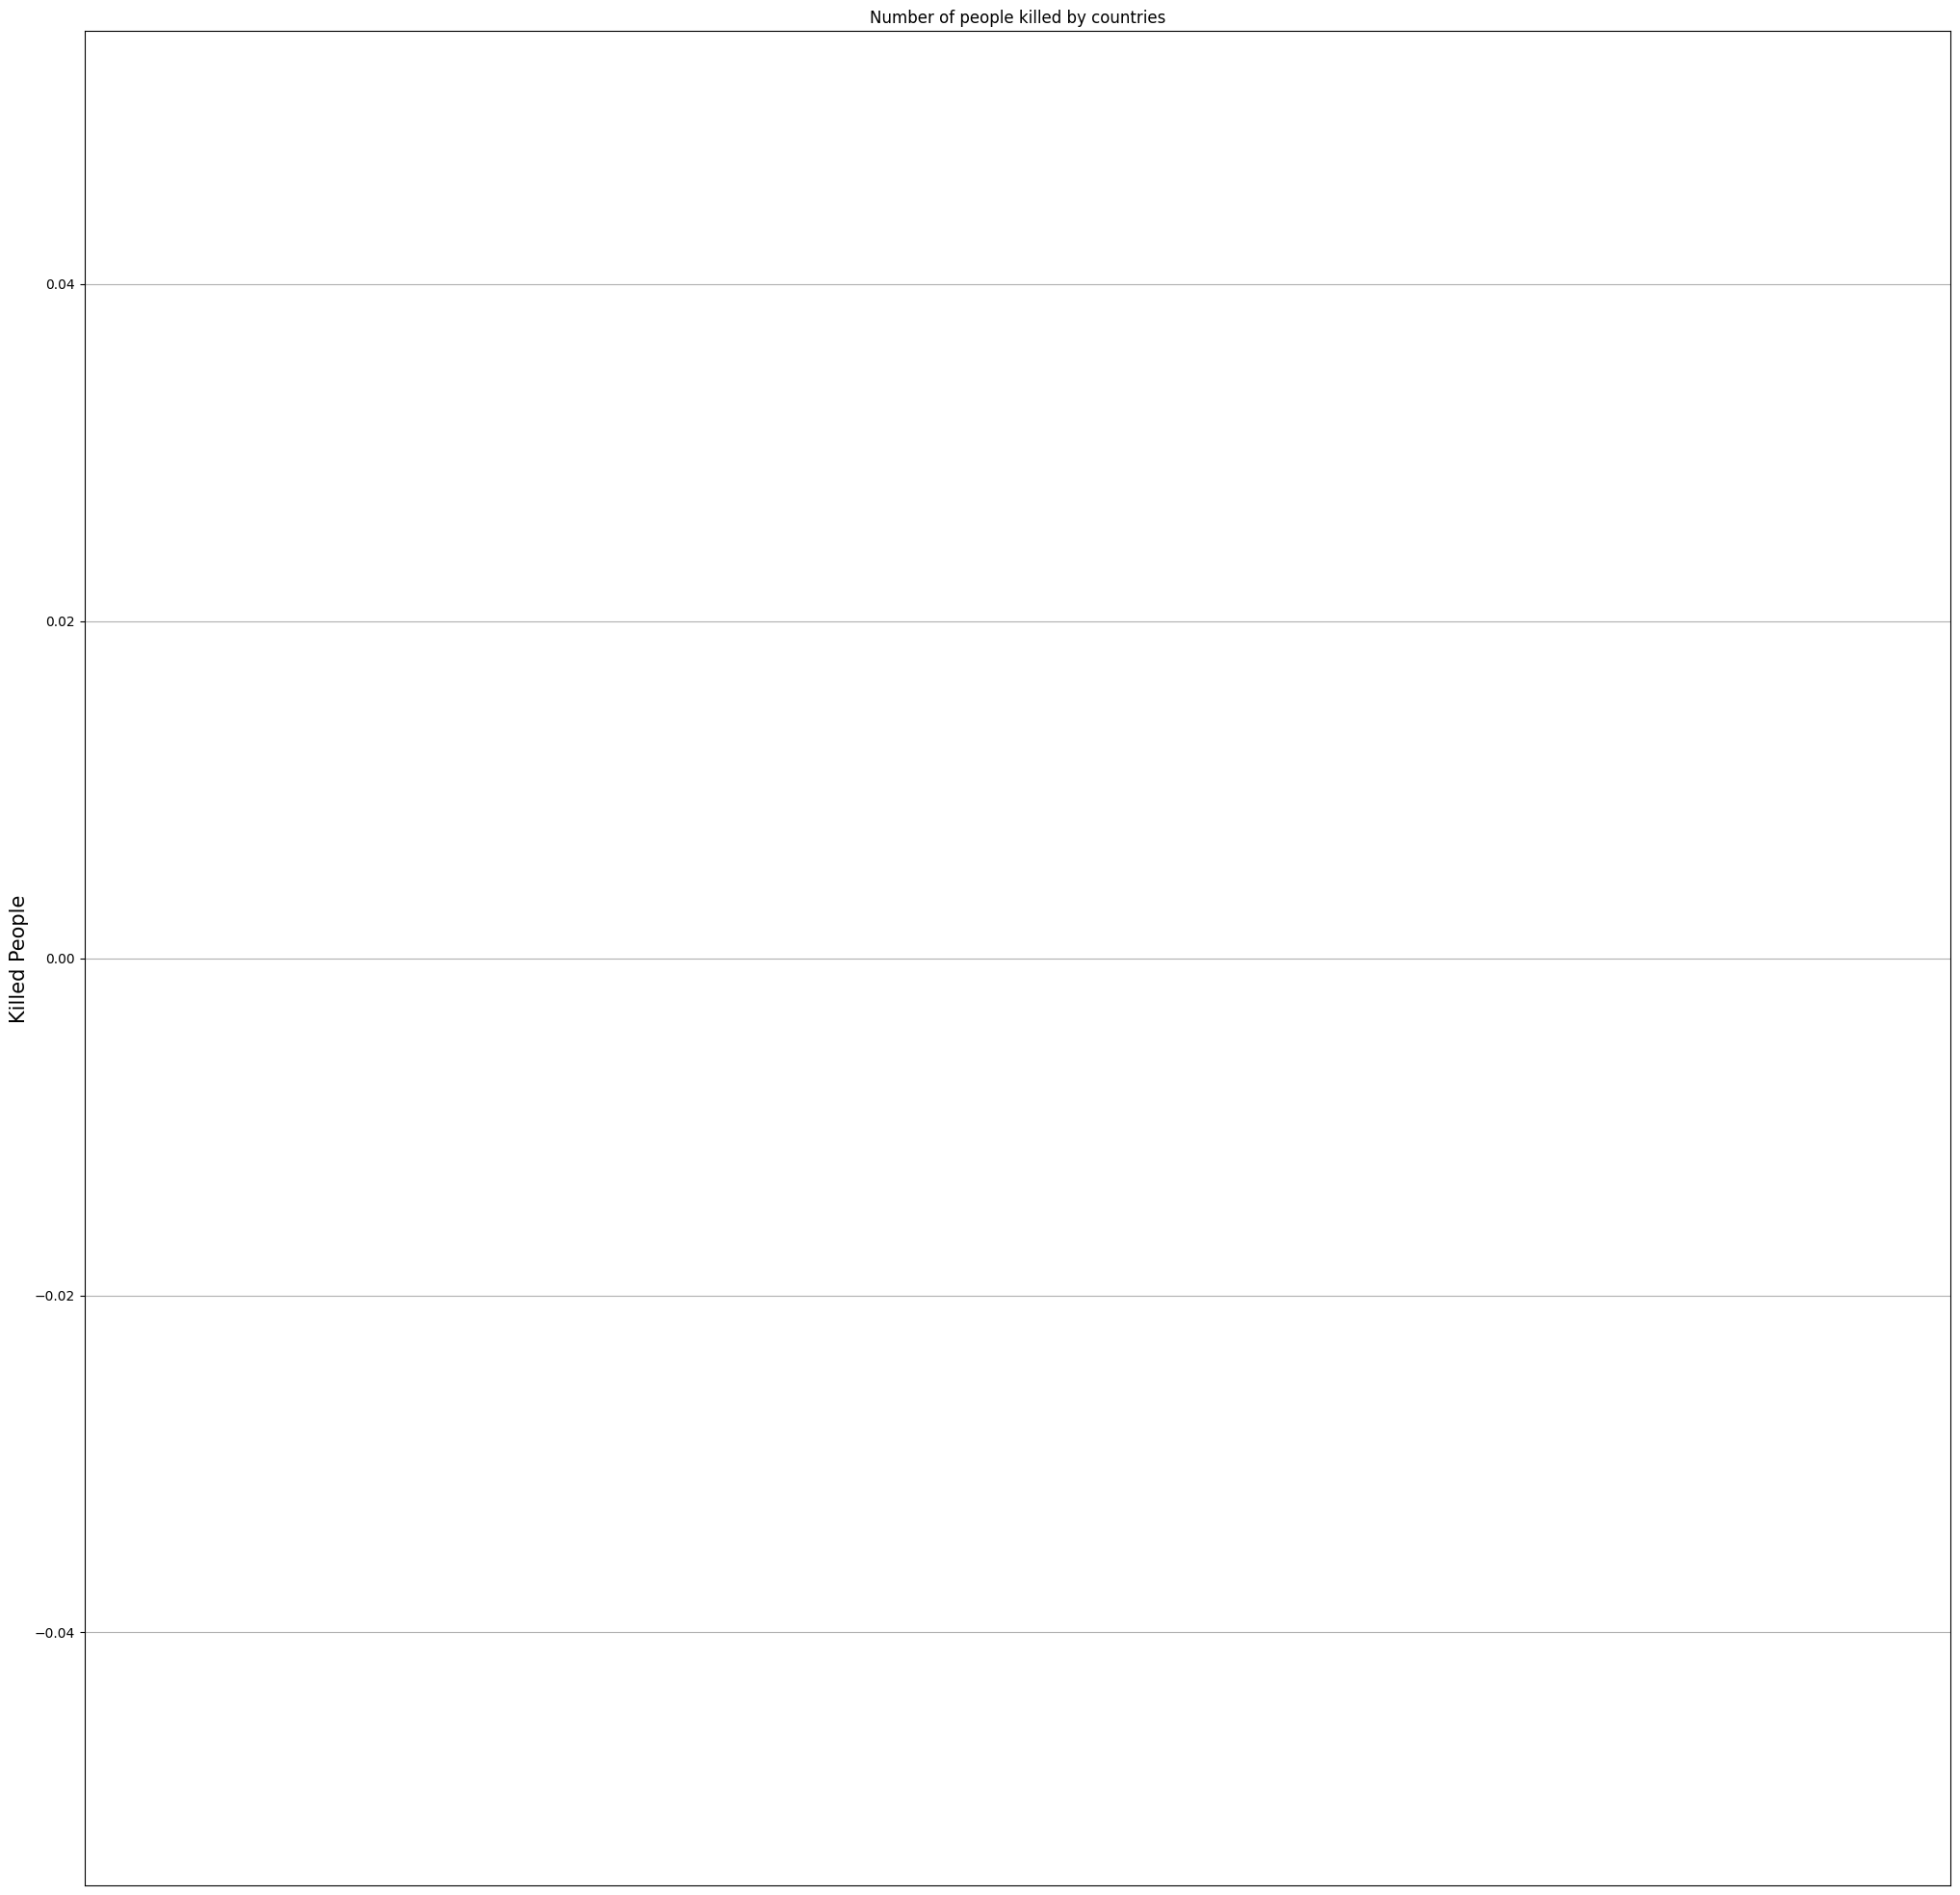

In [26]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()